In [27]:
import calendar
import datetime
import importlib 
import numpy as np
import os
import sys
from datetime import timedelta
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from parcels import Field, FieldSet, ParticleSet, Variable, JITParticle

sys.path.append('/home/vicentev/projects/def-allen/vicentev/analysis-vicente/OP_nibi')
from OP_functions_nibi import *

In [28]:
config_yaml = ['/home/vicentev/projects/def-allen/vicentev/analysis-vicente/OP_nibi/config_files/config_file_OP_P1.yaml']
param = load_config(config_yaml)
#
lon_iona = param['constants']['lon_iona'] # Longitude coordinate
lat_iona = param['constants']['lat_iona'] # Latitude coordinate

In [29]:
mask = xr.open_dataset('/home/vicentev/projects/def-allen/vicentev/analysis-vicente/grid/mesh_mask202108_TDV.nc')
from matplotlib.colors import ListedColormap, BoundaryNorm
# Colormap for mask
colors_0 = [(0, 0, 0, 1),  # Black for land
          (0, 0, 0, 0)]  # Transparent for water
cmap = ListedColormap(colors_0)

In [46]:
filename1 = '/home/vicentev/scratch/vicentev/Simulations_Runs/PBDEs_0112007_run_365_days_P1.zarr'
filename1_r = '/home/vicentev/scratch/vicentev/Simulations_Runs/RESTART_Runs/PBDEs_0112007_run_365_days_P1_restart_60_days_R1.zarr'
filename1_r_1 = '/home/vicentev/scratch/vicentev/Simulations_Runs/RESTART_Runs/PBDEs_0112007_run_365_days_P1_restart_60_days_R1_restart_33_days_R1_1.zarr'
vars_to_keep = ['trajectory', 'obs', 'lon', 'lat', 'z', 'time', 'status']
#
data1 = xr.open_dataset(filename1, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename1, engine = 'zarr').variables if v not in vars_to_keep])
data2 = xr.open_dataset(filename1_r, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename1_r, engine = 'zarr').variables if v not in vars_to_keep])
data3 = xr.open_dataset(filename1_r_1, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename1_r_1, engine = 'zarr').variables if v not in vars_to_keep])

data = xr.concat([data1, data2, data3], dim='obs' )

/tmp/ipykernel_3466063/3305436666.py:8: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  data3 = xr.open_dataset(filename1_r_1, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename1_r_1, engine = 'zarr').variables if v not in vars_to_keep])


/tmp/ipykernel_3466063/4191576217.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)


np.datetime64('2007-10-06T08:30:00.000000000')

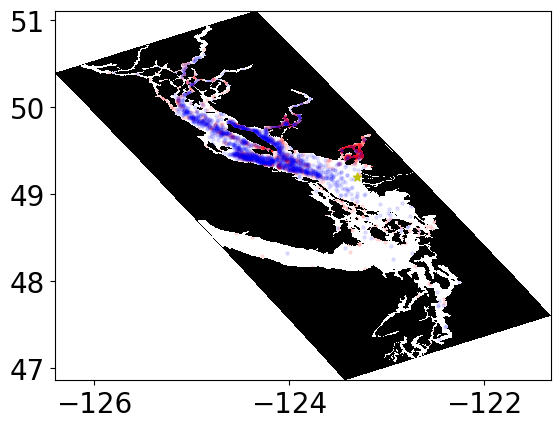

In [47]:
t = -1
plt.scatter(data1.lon.where(data1.status > 10)[:,t], data1.lat.where(data1.status > 10)[:,t], c = 'r', alpha = .1, s = 5)
plt.scatter(data1.lon.where((data1.status < 4) & (data1.status > 0))[:,t], data1.lat.where((data1.status < 4) & (data1.status > 0))[:,t], c = 'b', alpha = .1, s = 5)
plt.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)
plt.scatter(lon_iona, lat_iona, c = 'y', marker = '*')
data1.time[0,t].values

In [48]:
colloidal_water = []
marine_water = [] 
sewage_water = []
initial = []
colloidal_sediment = []
marine_sediment = []
sewage_sediment = []
particles_jdf = []
particles_js = []
total = []
#
for i in range(len(data.obs)):
    len_initial = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] < 0.))[0])
    len_1 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 1.))[0])
    len_2 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 2.))[0])
    len_3 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 3.))[0])
    len_11 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 11.))[0])
    len_12 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 12.))[0])
    len_13 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 13.))[0])
    len_jdf = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 7.))[0])
    len_js = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 8.))[0])

    #
    len_T = np.count_nonzero(~np.isnan(data.status[:, i]))
    #
    colloidal_water.append(len_2)
    marine_water.append(len_3) 
    sewage_water.append(len_1)
    initial.append(len_initial)
    colloidal_sediment.append(len_12)
    marine_sediment.append(len_13)
    sewage_sediment.append(len_11)
    particles_jdf.append(len_jdf)
    particles_js.append(len_js)

    total.append(len_T)
#    
proportion_initial = np.array(initial)/np.array(total) *100
#
proportion_colloidal_water = np.array(colloidal_water)/np.array(total) *100
proportion_marine_water = np.array(marine_water)/np.array(total) *100
proportion_sewage_water = np.array(sewage_water)/np.array(total) *100
#
proportion_colloidal_sediment = np.array(colloidal_sediment)/np.array(total) *100
proportion_marine_sediment = np.array(marine_sediment)/np.array(total) *100
proportion_sewage_sediment = np.array(sewage_sediment)/np.array(total) *100
p_out_jdf = np.array(particles_jdf)/np.array(total) *100
p_out_js = np.array(particles_js)/np.array(total) *100


In [49]:
proportion_water = proportion_sewage_water + proportion_colloidal_water + proportion_marine_water
proportion_sediment = proportion_sewage_sediment + proportion_colloidal_sediment + proportion_marine_sediment
proportion_sewage = proportion_sewage_water + proportion_sewage_sediment 
proportion_colloidal = proportion_colloidal_water + proportion_colloidal_sediment 
proportion_marine = proportion_marine_water + proportion_marine_sediment 

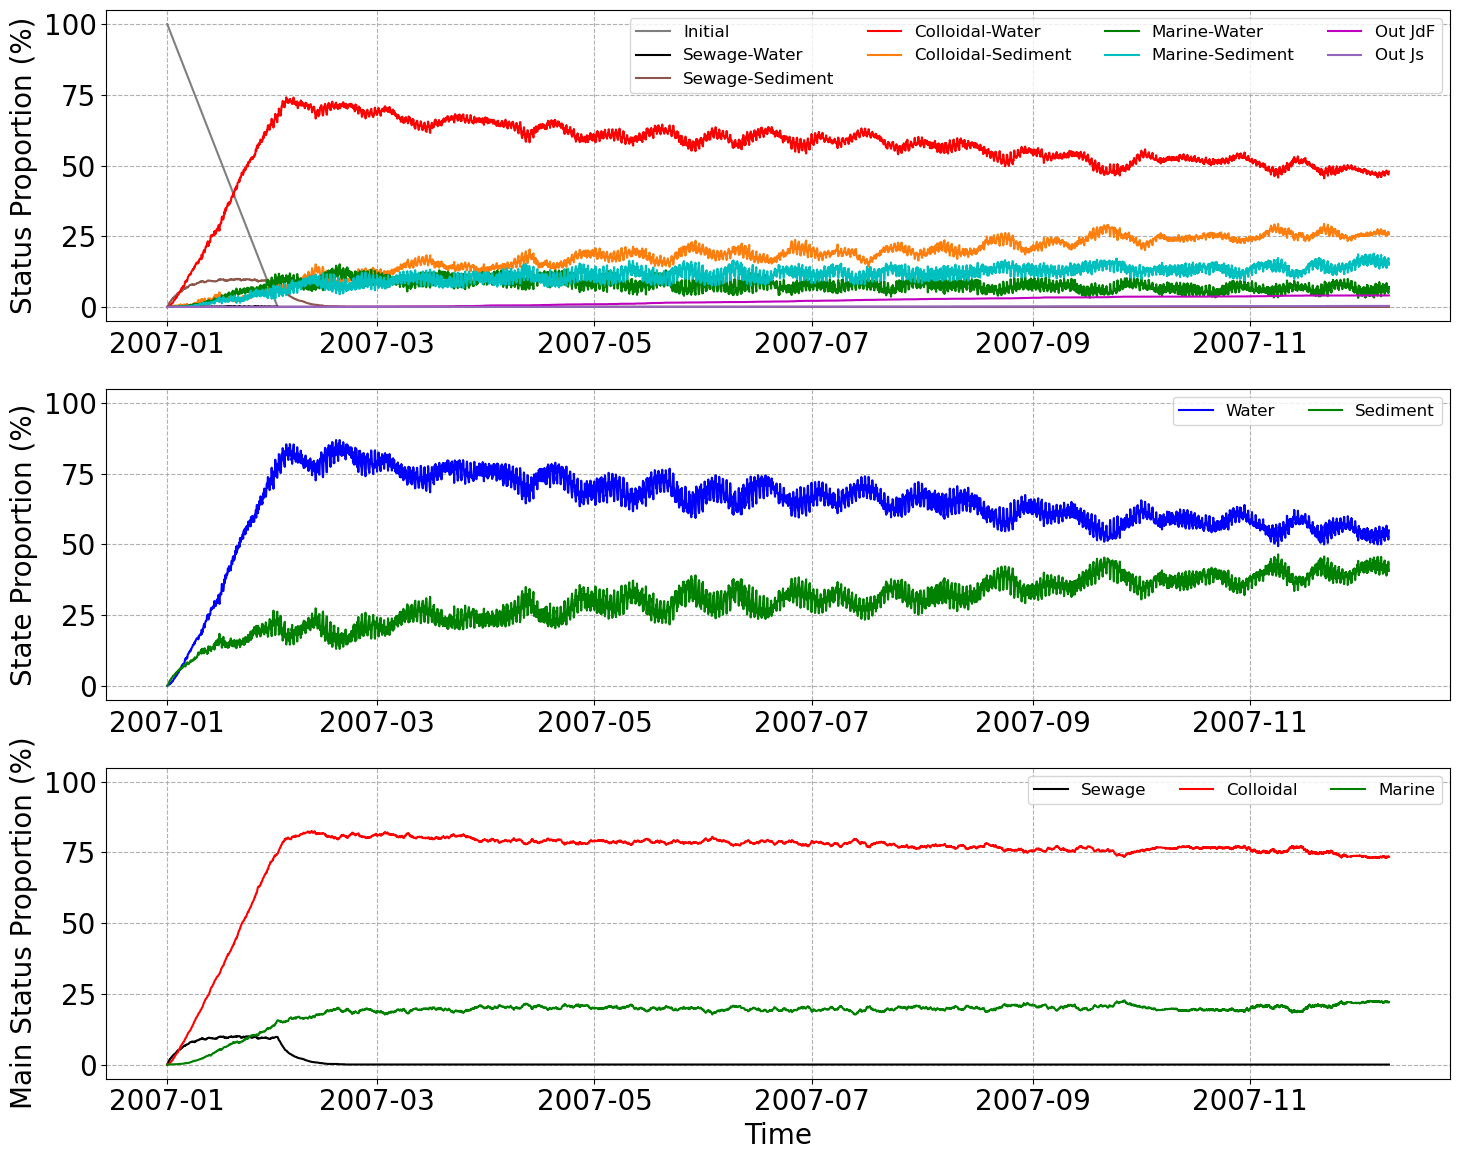

In [50]:
plt.rcParams.update({'font.size': 20})
time_axis = data.time[0,:]
fig, ax = plt.subplots(3,1,figsize = (15,12))
# initial
ax[0].plot(time_axis, proportion_initial, '-' ,c = 'tab:grey', label = 'Initial')
# Sewage particles in the water column
ax[0].plot(time_axis, proportion_sewage_water, '-' ,c = 'k', label = 'Sewage-Water')
ax[0].plot(time_axis, proportion_sewage_sediment, '-' , c = 'tab:brown', label = 'Sewage-Sediment')
#
#  Colloidal particles in the water column
ax[0].plot(time_axis, proportion_colloidal_water, '-' ,c = 'r', label = 'Colloidal-Water')
ax[0].plot(time_axis, proportion_colloidal_sediment, '-' , c = 'tab:orange', label = 'Colloidal-Sediment')
#
# Marine particles in the water column
ax[0].plot(time_axis, proportion_marine_water, '-' ,c = 'g', label = 'Marine-Water')
ax[0].plot(time_axis, proportion_marine_sediment, '-' , c = 'c', label = 'Marine-Sediment')
#
ax[0].plot(time_axis, p_out_jdf, '-' , c = 'm', label = 'Out JdF')
ax[0].plot(time_axis, p_out_js, '-' , c = 'tab:purple', label = 'Out Js')


#
ax[0].legend(ncol = 4, fontsize = 12)
ax[0].grid(linestyle = '--')
#
ax[0].set_ylabel('Status Proportion (%)')
#
ax[0].set_ylim([-5,105])
###################################################
ax[1].plot(time_axis, proportion_water, '-b', label = 'Water')
ax[1].plot(time_axis, proportion_sediment, '-g', label = 'Sediment')
#
ax[1].legend(ncol = 2, fontsize = 12)
ax[1].grid(linestyle = '--')
ax[1].set_ylabel('State Proportion (%)')
ax[1].set_ylim([-5,105])
###################################################
ax[2].plot(time_axis, proportion_sewage, '-k', label = 'Sewage')
ax[2].plot(time_axis, proportion_colloidal, '-r', label = 'Colloidal')
ax[2].plot(time_axis, proportion_marine, '-g' , label = 'Marine')
ax[2].legend(ncol = 3, fontsize = 12)
ax[2].grid(linestyle = '--')
ax[2].set_ylabel('Main Status Proportion (%)')
ax[2].set_xlabel('Time')
ax[2].set_ylim([-5,105])
plt.tight_layout()

In [51]:
data3.time[0,-1].values

np.datetime64('2007-12-10T01:53:30.411424003')

In [ ]:
# Defining parameters from yaml file:
config_yaml = ['/home/vicentev/projects/def-allen/vicentev/analysis-vicente/OP_nibi/config_files/config_file_test.yaml']
param = load_config(config_yaml)
#Timing definitions
start_simulation = datetime.datetime(param['release_params']['start_sim_year'], param['release_params']['start_sim_month'], param['release_params']['start_sim_day']) #Start date simulation
start_release = datetime.datetime(param['release_params']['year_start_release'], param['release_params']['month_start_release'], param['release_params']['day_start_release']) #Start date release
day_release = param['release_params']['days_of_release'] # how many days to release particles
release_freq = param['release_params']['release_particles_freq'] # release frequency in seconds
length = param['release_params']['simulation_length'] # Simulatio length in days
delta_t = param['release_params']['delta_t'] # Processes resolution in seconds
n_outputs = param['release_params']['number_outputs'] # number of output observations
#
# Iona Constants Definitions
lon_iona = param['constants']['lon_iona'] # Longitude coordinate
lat_iona = param['constants']['lat_iona'] # Latitude coordinate
depth_iona = param['constants']['depth_iona'] # Depth of release
fraction_colloidal = param['constants']['fraction_colloidal'] # fraction of particles released in colloidal phase
#
# Particles Features
vel_sewage = param['particles_features']['sinking_vel_sewage'] # sinking vel of sewage particles
vel_marine = param['particles_features']['sinking_vel_marine'] # sinking vel of marine particles
absorption = param['particles_features']['absorption'] # absorption of colloidal to marine particles
ratio_MC = param['particles_features']['ratio_marine_colloidal'] # ratio between colloidal and marine particles in the WC
fraction_sediment = param['particles_features']['fraction_sediment'] # fraction of colloidal to marine particles in the sediment
#
# Grid Parameters
deg2met = param['grid_params']['deg2met'] # conversion from degrees to meters
latT = param['grid_params']['latT'] 
dx_lat = param['grid_params']['dx_lat']
dx_lon = param['grid_params']['dx_lon']
dy_lat = param['grid_params']['dy_lat']
dy_lon = param['grid_params']['dy_lon']
#
# Resuspension Parameters
kappa = param['resuspension_params']['kappa']
zo = param['resuspension_params']['zo']
rho = param['resuspension_params']['rho']
cdmin = param['resuspension_params']['cdmin']
cdmax = param['resuspension_params']['cdmax']
tau_crit = param['resuspension_params']['tau_critical'] # critical resuspension tau value
#
# Name Extension Simulation
extension = param['name_extension']


In [ ]:
 # 30  # number of days to release particles
data_length = max(length, 1)
duration = datetime.timedelta(days=length)
delta_t = 5  # seconds

number_particles = int(min(length, day_release) * 86400 / release_freq)
print("number_particles", number_particles)

output_interval = datetime.timedelta(seconds=length * 86400 / n_outputs)

In [ ]:
seconds_initial = (start_release - start_simulation).total_seconds()

In [ ]:
start_simulation.day

In [ ]:
release_freq * number_particles

In [ ]:
np.arange(seconds_initial, seconds_initial + (release_freq * number_particles), release_freq)

In [ ]:
np.arange(0,2* release_freq * number_particles, release_freq)

In [ ]:
data0 = xr.open_dataset('/home/vicentev/scratch/vicentev/Simulations_Runs/PBDEs_0112007_run_1_days_testing_sim_1_day.zarr', engine = 'zarr')
data1 = xr.open_dataset('/home/vicentev/scratch/vicentev/Simulations_Runs/PBDEs_0112007_run_2_days_testing_sim_2_day.zarr', engine = 'zarr')

In [ ]:
t = 23
plt.scatter(data1.lon[:,t], data1.lat[:,t], c = 'k')
plt.scatter(lon_iona, lat_iona, c = 'r')

In [ ]:
data_restart = xr.open_dataset('/home/vicentev/scratch/vicentev/Simulations_Runs/RESTART_Runs/PBDEs_0112007_run_2_days_testing_sim_2_day_restart_2_days_testing_restart.zarr', engine = 'zarr')

In [ ]:
t0 = 23
t1 = 23

plt.scatter(data1.lon[:,t0], data1.lat[:,t0], c = 'k')
plt.scatter(data_restart.lon[:,t1], data_restart.lat[:,t1], c = 'b')

plt.scatter(lon_iona, lat_iona, c = 'r')

In [ ]:
data_test = xr.open_dataset('/home/vicentev/scratch/vicentev/Simulations_Runs/PBDEs_0112007_run_1_days_testing_sim_1.zarr', engine = 'zarr')

In [ ]:
t = 23
plt.scatter(data_test.lon[:,t], data_test.lat[:,t], c = 'k')
plt.scatter(lon_iona, lat_iona, c = 'r')